In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')






In [2]:
train = pd.read_csv('M20_P14_Restaurant_food_cost_Data_Train.csv')
test = pd.read_csv('M20_P14_Restaurant_food_cost_Data_Test.csv')
train.head(50)



,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550 votes,800
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509 votes,600
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612 votes,1600
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101 votes,300
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219 votes,200


In [3]:
train.isnull()


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
12685,False,False,False,False,False,False,False,False,False
12686,False,False,False,False,False,False,False,False,False
12687,False,False,False,False,False,False,False,False,False
12688,False,False,False,False,False,False,False,False,False


In [4]:
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [5]:
test.isnull()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4226,False,False,False,False,False,False,False,False
4227,False,False,False,False,False,False,False,False
4228,False,False,False,False,False,False,False,False
4229,False,False,False,False,False,False,False,True


In [6]:
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [9]:
train.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [10]:
test.describe()

,RESTAURANT_ID
count,4231.000000
mean,7791.438431
std,4458.797621
min,3.000000
25%,3908.500000
50%,7798.000000
75%,11634.000000
max,15572.000000


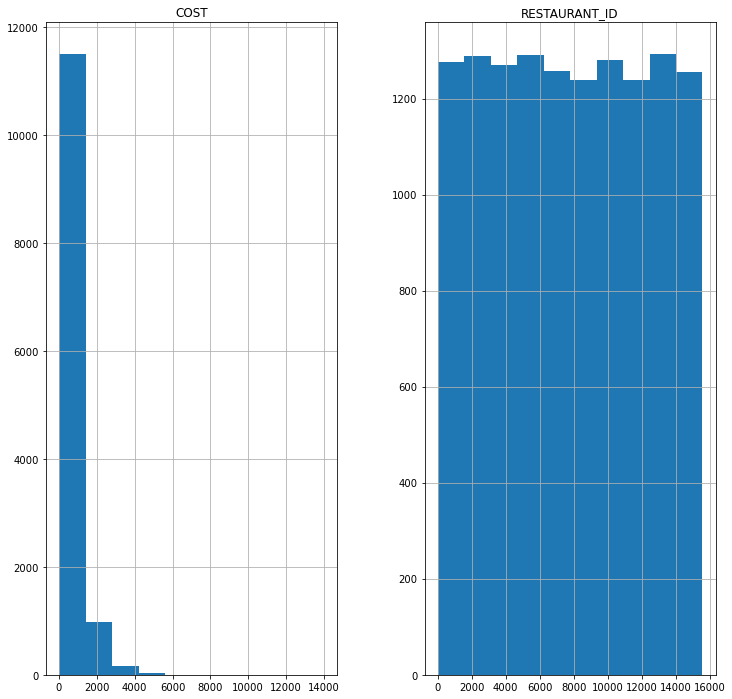

In [11]:
train.hist(figsize=(12,12));

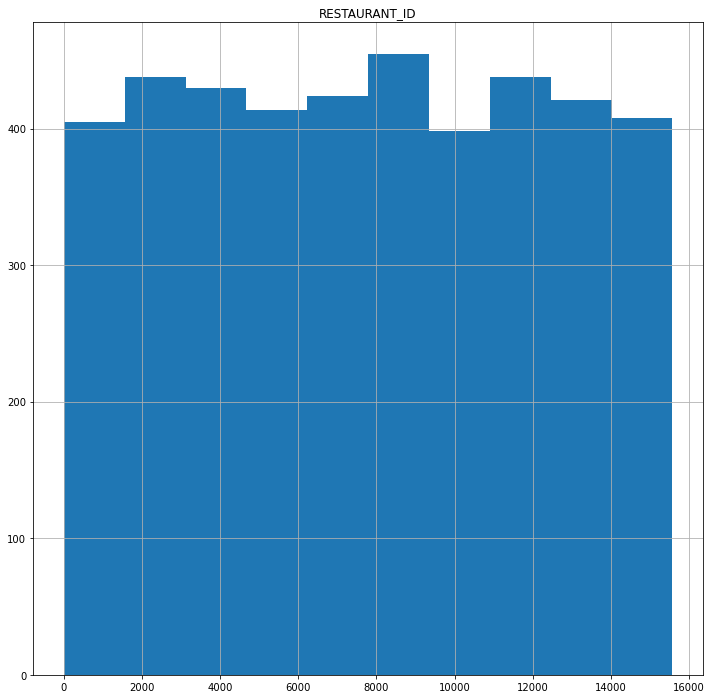

In [12]:
test.hist(figsize=(12,12));

In [13]:
train.TITLE.unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112]),
 <a list of 113 Text major ticklabel objects>)

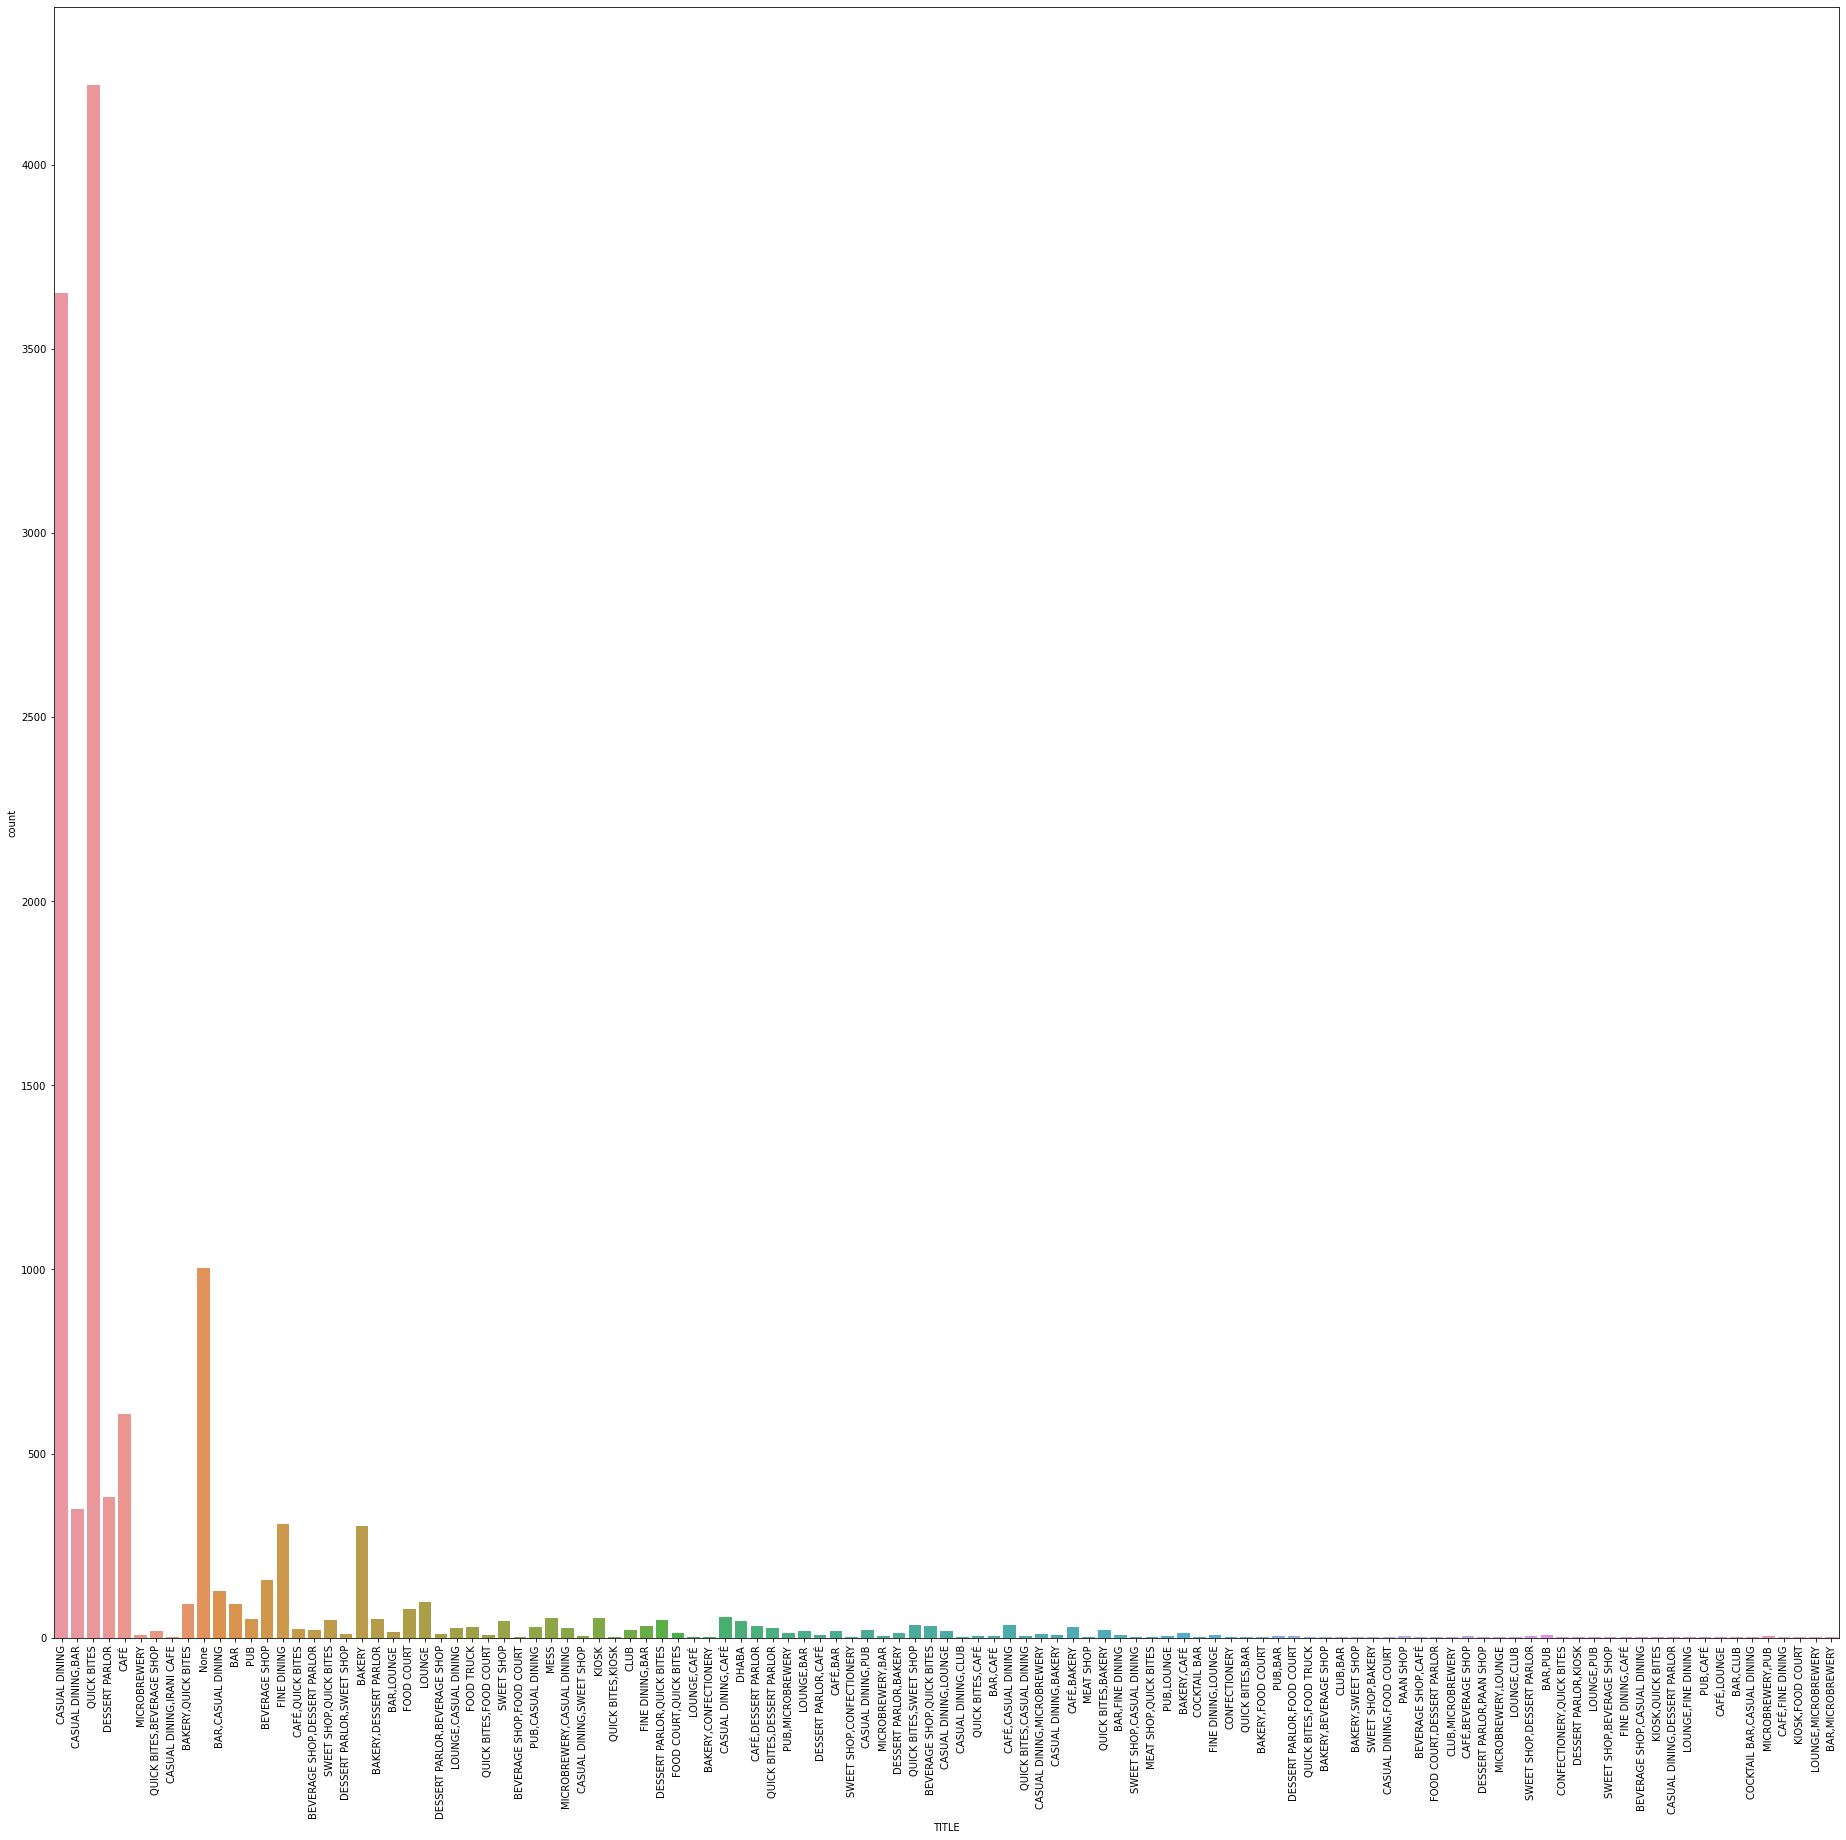

In [14]:
plt.figure(figsize=(32,30))
sns.countplot(train.TITLE)
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

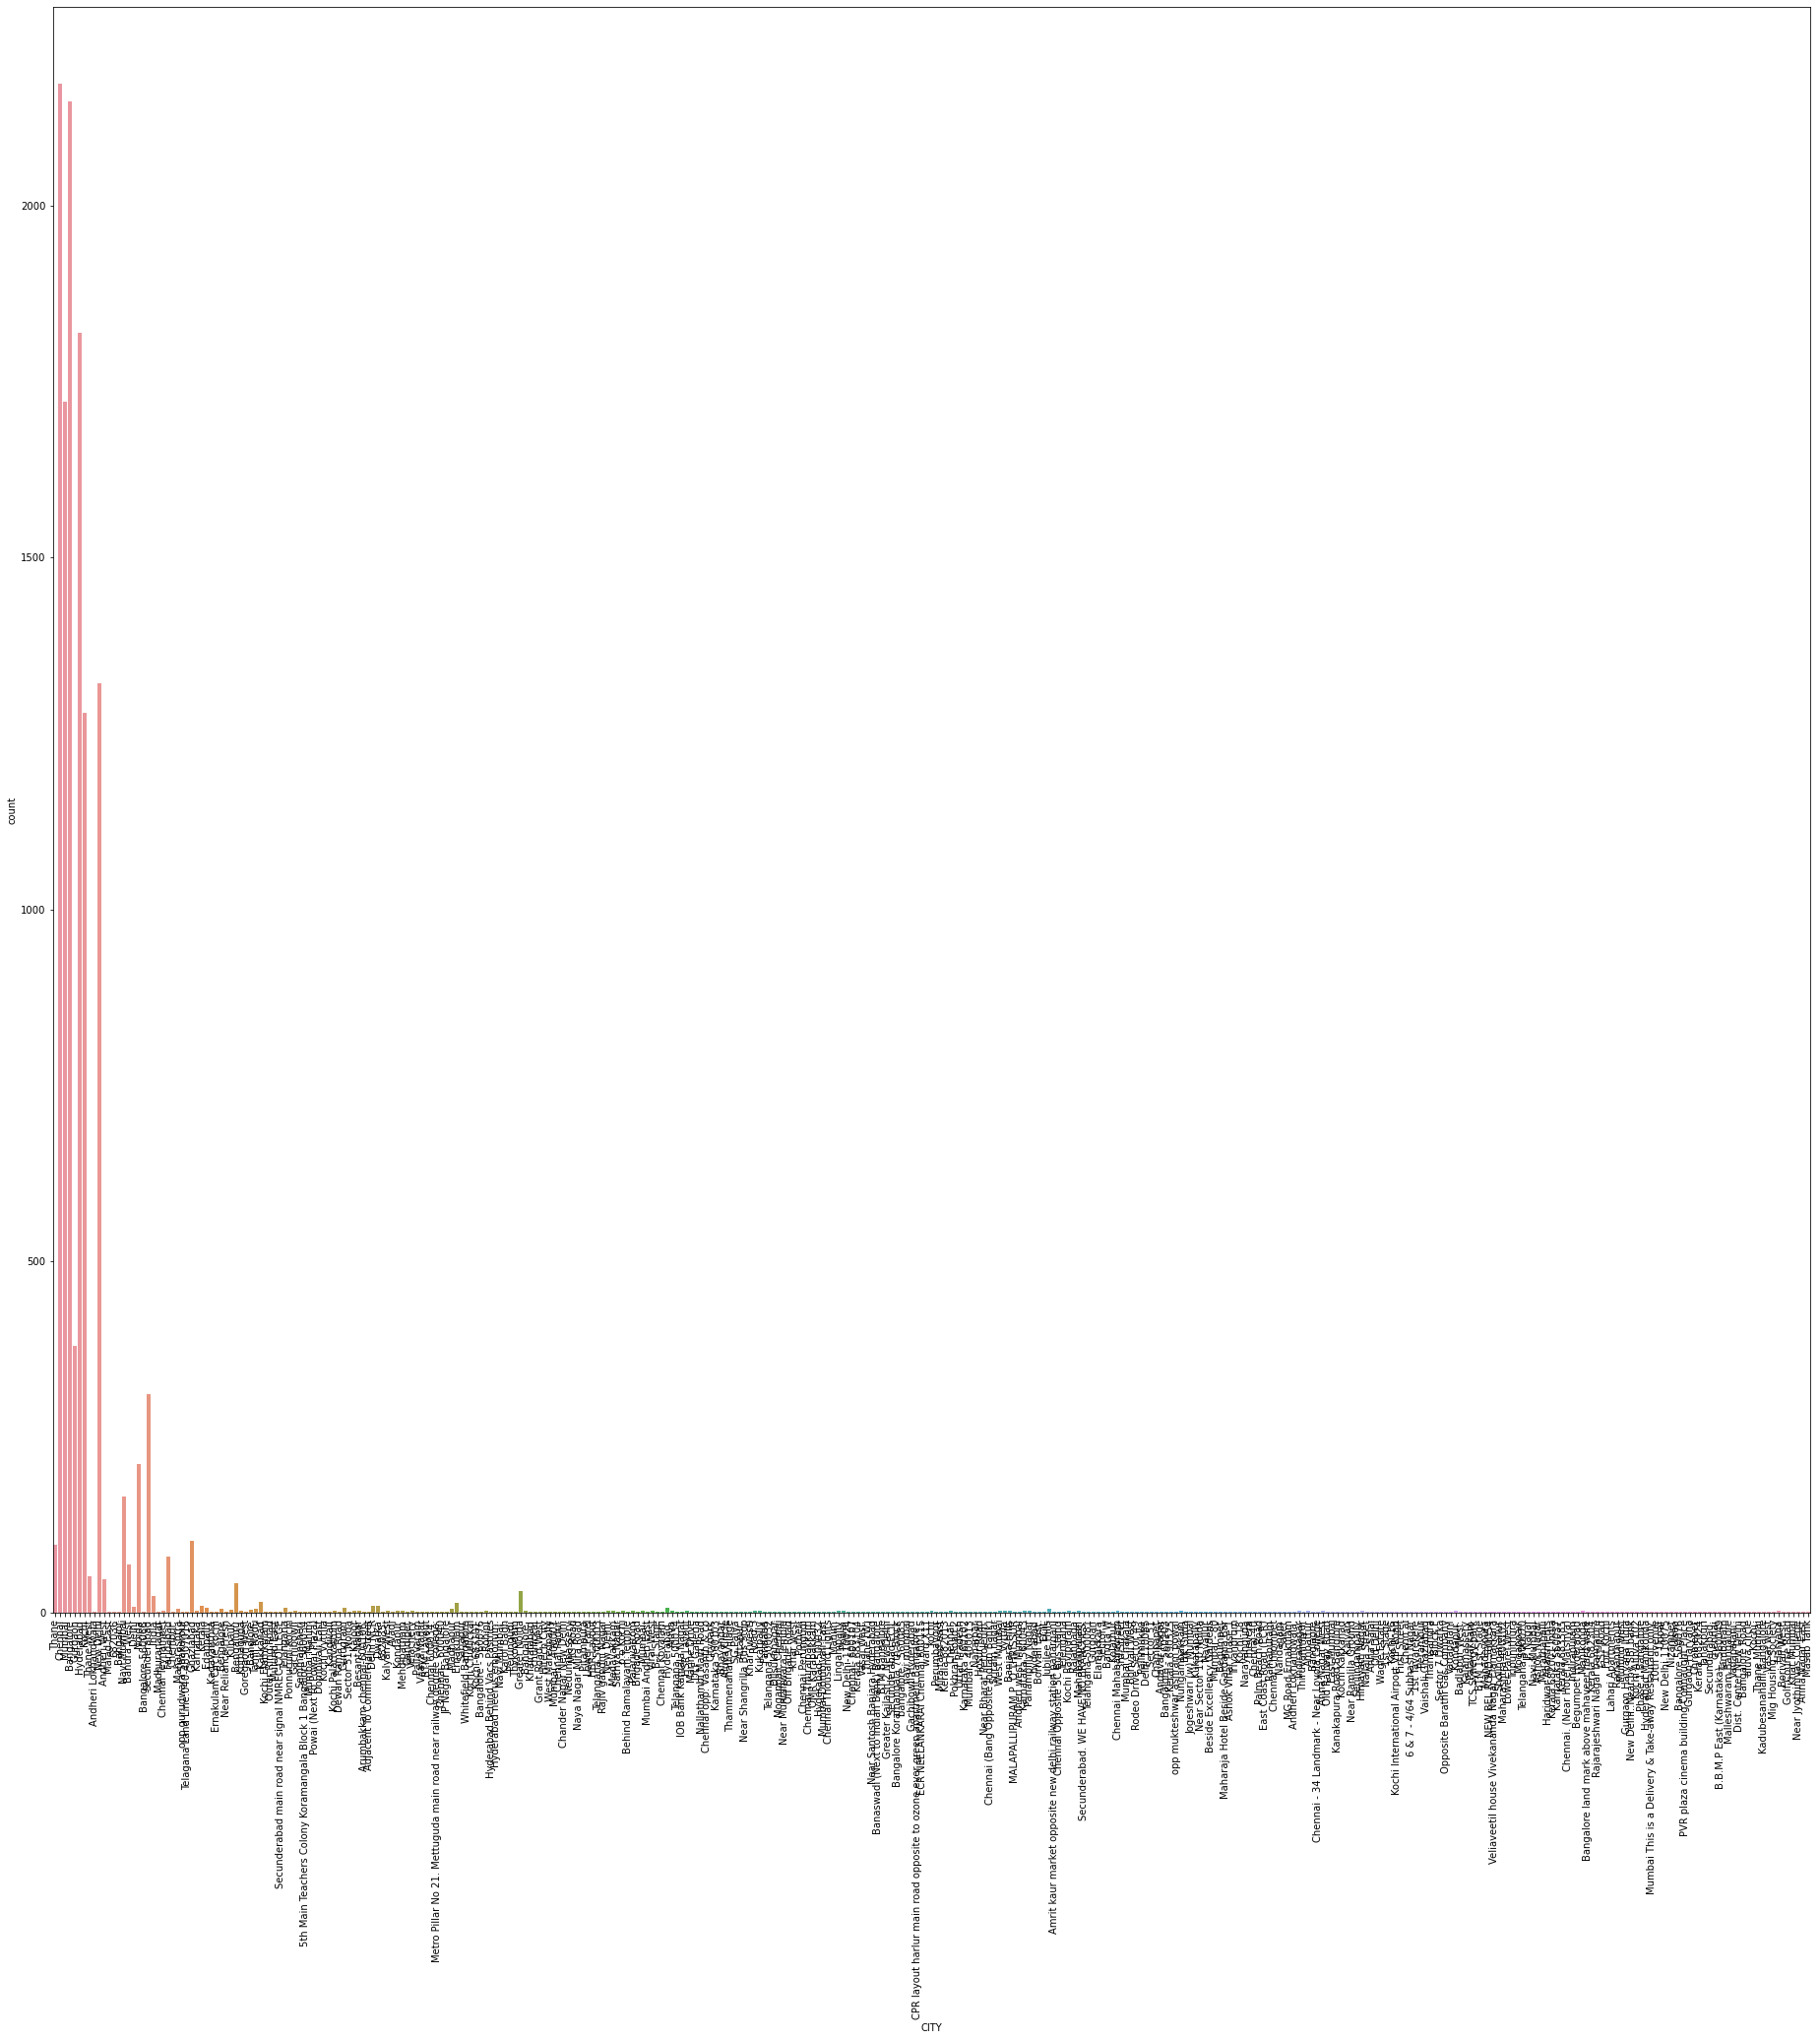

In [15]:
plt.figure(figsize=(32,30))
sns.countplot(train.CITY)
plt.xticks(rotation=90)

In [16]:
train.CITY.value_counts()

Chennai                          2174
Bangalore                        2149
Hyderabad                        1819
Mumbai                           1722
New Delhi                        1321
                                 ... 
Chennai Opposite 5C Bus stand       1
Near Jyothinivas College            1
khar west                           1
Thiruvanmiyur                       1
Brigade Road                        1
Name: CITY, Length: 359, dtype: int64

(array([   0,    1,    2, ..., 1844, 1845, 1846]),
 <a list of 1847 Text major ticklabel objects>)

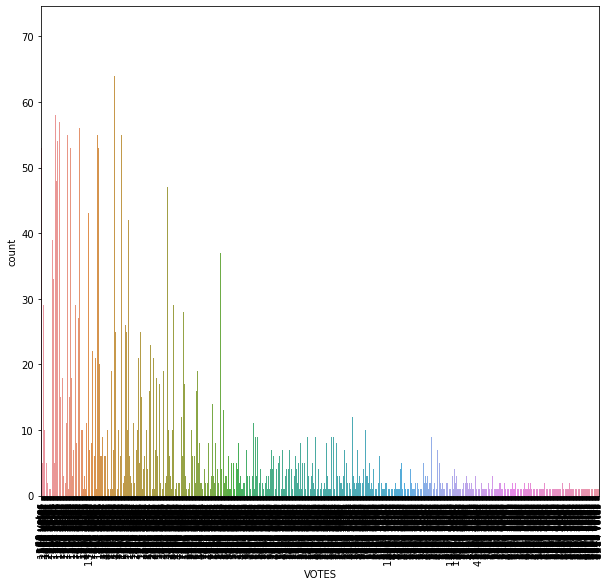

In [17]:
plt.figure(figsize=(10,9))
sns.countplot(train.VOTES)
plt.xticks(rotation=90)

In [18]:
train.VOTES.value_counts()

44 votes      71
28 votes      66
29 votes      66
38 votes      65
35 votes      64
              ..
1278 votes     1
997 votes      1
2359 votes     1
948 votes      1
1010 votes     1
Name: VOTES, Length: 1847, dtype: int64

In [19]:
train.RATING.value_counts()

3.9    1238
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: RATING, dtype: int64

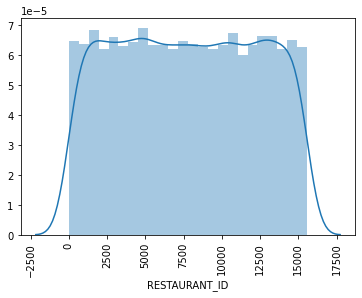

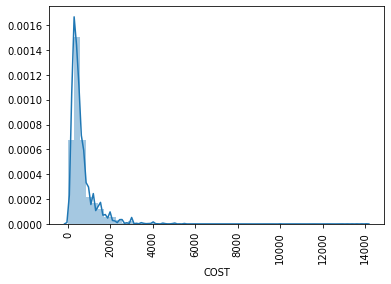

In [20]:
for i in train.describe().columns:
    sns.distplot(train[i])
    plt.xticks(rotation=90)
    plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112],
 <a list of 113 Text major ticklabel objects>)

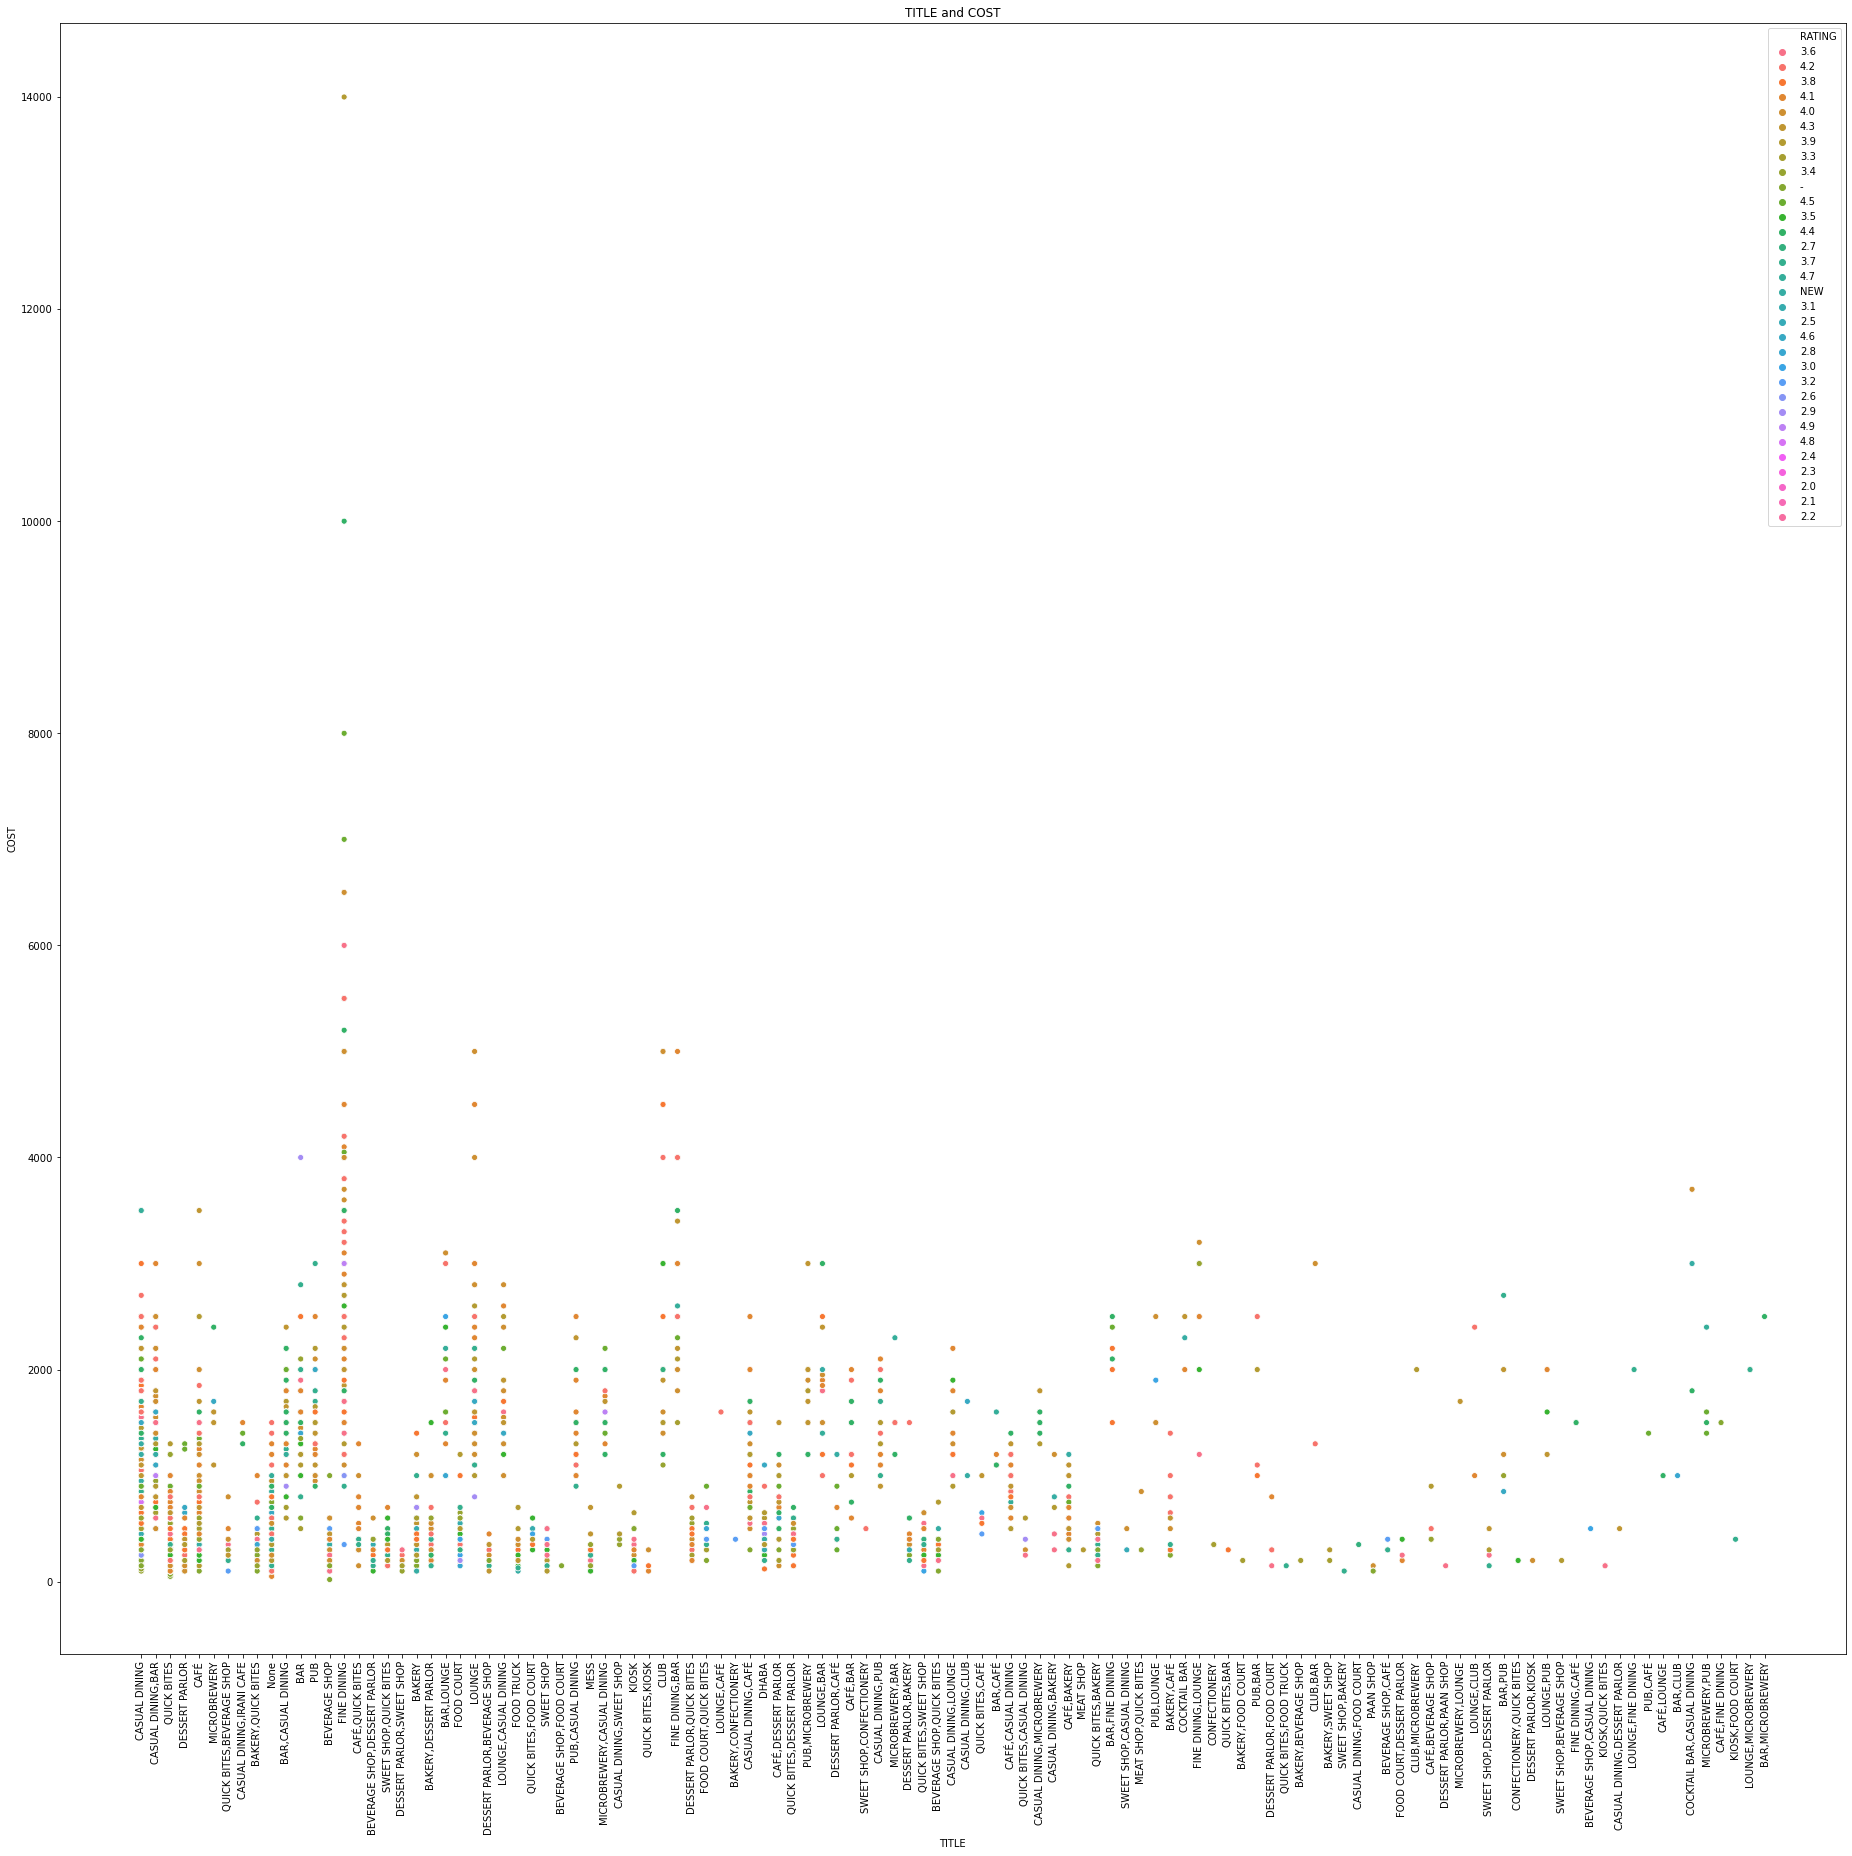

In [21]:
plt.figure(figsize=(32,30))
plt.xlabel('TITLE')
plt.ylabel('COST')
plt.title('TITLE and COST')
sns.scatterplot(x='TITLE',y='COST',hue='RATING',data=train)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

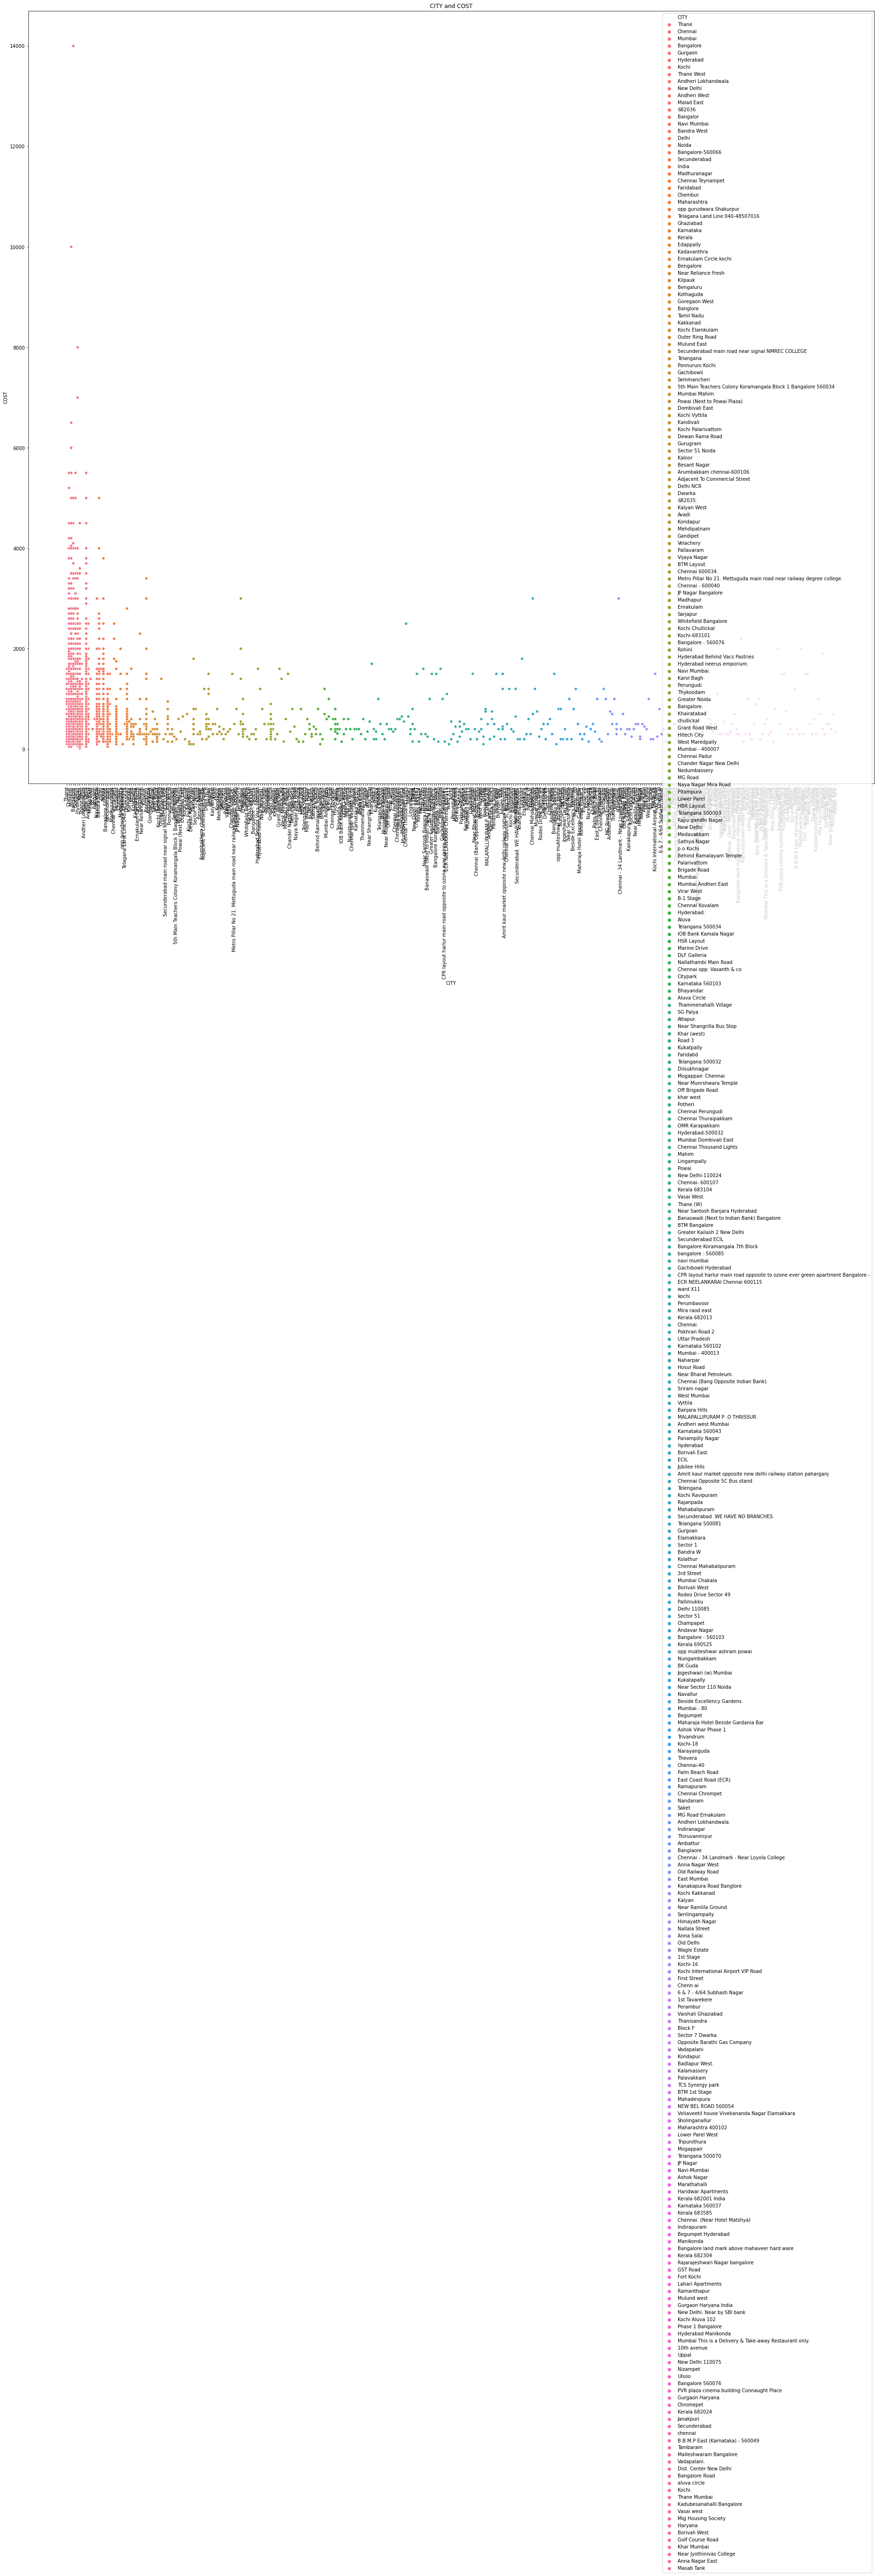

In [22]:
plt.figure(figsize=(32,30))
plt.xlabel('CITY')
plt.ylabel('COST')
plt.title('CITY and COST')
sns.scatterplot(x='CITY',y='COST',hue='CITY',data=train)
plt.xticks(rotation=90)

In [23]:
train.CUISINES.value_counts()

South Indian                         532
North Indian                         526
North Indian, Chinese                501
Fast Food                            286
Chinese                              167
                                    ... 
North Indian, Healthy Food             1
Turkish, Kebab                         1
Rolls, North Indian, Fast Food         1
Kerala, French, European, Seafood      1
Biryani, Andhra, Kebab                 1
Name: CUISINES, Length: 4155, dtype: int64

In [24]:
train.TIME.value_counts()

11am – 11pm (Mon-Sun)                                 1415
12noon – 12midnight (Mon-Sun)                          469
12noon – 11pm (Mon-Sun)                                407
11am – 12midnight (Mon-Sun)                            310
10am – 10pm (Mon-Sun)                                  221
                                                      ... 
12noon – 3pm, 7pm – 11:45pm (Mon-Sun)                    1
11:30am – 11pm (Mon-Sat),11:4am – 12midnight (Sun)       1
11:30am – 11pm (Mon-Thu),11:30am – 12midnight...         1
8:30am – 10:30pm (Mon-Fri),8am – 11pm (Sat-Sun)          1
5am – 10:30pm (Mon-Sun)                                  1
Name: TIME, Length: 2689, dtype: int64

In [25]:
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [26]:
test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [27]:
label=LabelEncoder()
varib = ['CITY','VOTES','RATING','LOCALITY','TITLE','RESTAURANT_ID','CUISINES','TIME']
for i in varib:
    train[i]=label.fit_transform(train[i].astype(str))

train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,11416,2627,739,320,285,17,1278,1200
1,33,2729,289,1885,67,1046,23,950,1500
2,31,800,2976,661,67,1101,19,712,800
3,95,8827,4130,275,222,136,22,787,800
4,50,4591,1766,615,222,620,19,470,300
...,...,...,...,...,...,...,...,...,...
12685,95,2757,2934,1144,131,342,19,1349,500
12686,33,11630,2143,1177,222,133,24,191,1800
12687,71,990,2088,1137,239,1342,21,1428,1300
12688,31,8652,3506,1837,67,631,16,996,400


In [28]:
for column in ['CITY','VOTES','RATING']:
    train[column].fillna(train[column].mean(),inplace=True)

In [29]:
train['LOCALITY'].fillna(train['LOCALITY'].median(),inplace=True)


In [30]:
train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [31]:
label=LabelEncoder()
varib = ['CITY','VOTES','RATING','LOCALITY','TITLE','RESTAURANT_ID','CUISINES','TIME']
for i in varib:
    test[i]=label.fit_transform(test[i].astype(str))

test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,2368,1293,503,110,662,23,823
1,75,776,1632,933,96,221,22,871
2,23,1182,1455,219,96,411,18,575
3,66,1735,208,1071,41,456,18,179
4,75,987,1637,208,78,300,16,394
...,...,...,...,...,...,...,...,...
4226,23,3841,1425,103,108,597,19,487
4227,66,720,267,262,9,237,23,722
4228,75,3703,679,1052,41,696,17,789
4229,75,3063,1541,215,78,332,0,1136


In [32]:
for column in ['CITY','VOTES','RATING']:
    test[column].fillna(test[column].mean(),inplace=True)

In [33]:
test['LOCALITY'].fillna(test['LOCALITY'].median(),inplace=True)

In [34]:
test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

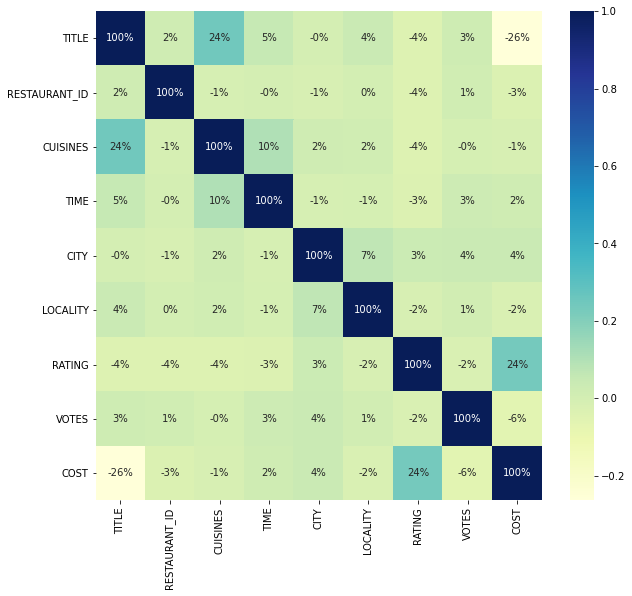

In [35]:
plt.figure(figsize=(10,9))
sns.heatmap(train.corr(),vmax=1,cmap='YlGnBu',annot=True,fmt='.0%')
plt.show()

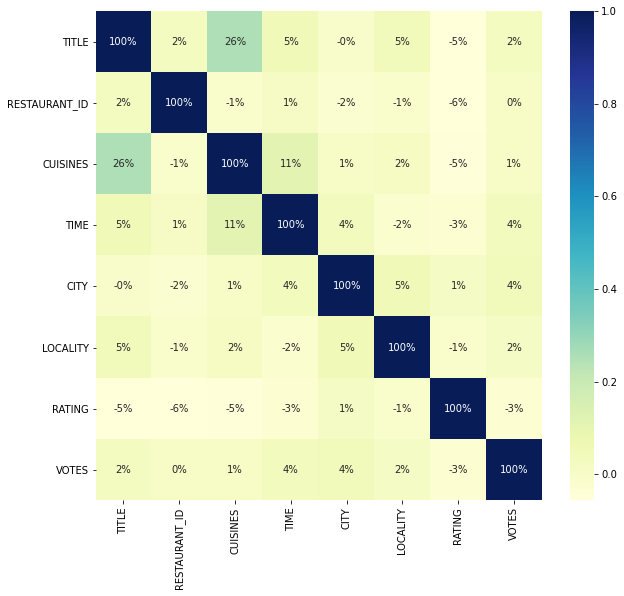

In [36]:
plt.figure(figsize=(10,9))
sns.heatmap(test.corr(),vmax=1,cmap='YlGnBu',annot=True,fmt='.0%')
plt.show()

In [37]:
df=pd.concat([train,test],ignore_index=True)
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,11416,2627,739,320,285,17,1278,1200.0
1,33,2729,289,1885,67,1046,23,950,1500.0
2,31,800,2976,661,67,1101,19,712,800.0
3,95,8827,4130,275,222,136,22,787,800.0
4,50,4591,1766,615,222,620,19,470,300.0
...,...,...,...,...,...,...,...,...,...
16916,23,3841,1425,103,108,597,19,487,NaN
16917,66,720,267,262,9,237,23,722,NaN
16918,75,3703,679,1052,41,696,17,789,NaN
16919,75,3063,1541,215,78,332,0,1136,NaN


In [38]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
VOTES               0
COST             4231
dtype: int64

In [39]:
df.describe()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,12690.000000
mean,56.044087,4978.445127,1908.430648,1015.813604,123.468708,592.237279,18.527924,944.844158,655.252246
std,31.850379,3463.430818,1212.302948,732.670071,85.379019,387.682164,6.199858,534.910315,627.003540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,31.000000,2029.000000,849.000000,478.000000,55.000000,282.000000,16.000000,500.000000,300.000000
50%,50.000000,4051.000000,1694.000000,843.000000,108.000000,514.000000,19.000000,942.000000,500.000000
75%,95.000000,7921.000000,2946.000000,1528.000000,173.000000,844.000000,22.000000,1355.000000,800.000000
max,112.000000,11891.000000,4154.000000,2688.000000,359.000000,1416.000000,32.000000,1847.000000,14000.000000


In [40]:
df.COST.mean()

655.2522458628841

In [41]:
df['COST'].fillna(df['COST'].mean(),inplace=True)
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,11416,2627,739,320,285,17,1278,1200.000000
1,33,2729,289,1885,67,1046,23,950,1500.000000
2,31,800,2976,661,67,1101,19,712,800.000000
3,95,8827,4130,275,222,136,22,787,800.000000
4,50,4591,1766,615,222,620,19,470,300.000000
...,...,...,...,...,...,...,...,...,...
16916,23,3841,1425,103,108,597,19,487,655.252246
16917,66,720,267,262,9,237,23,722,655.252246
16918,75,3703,679,1052,41,696,17,789,655.252246
16919,75,3063,1541,215,78,332,0,1136,655.252246


Text(0.5, 1.0, 'Correlation with target Variable COST')

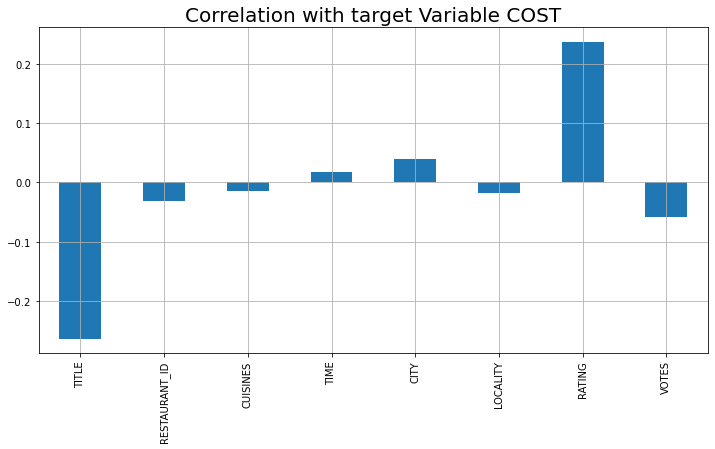

In [42]:
plt.figure(figsize=(12,6))
train.drop('COST',axis=1).corrwith(train['COST']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title("Correlation with target Variable COST", fontsize=20)

In [43]:
from scipy.stats import zscore
z=np.abs(zscore(train))
z

array([[0.86888688, 1.59514302, 0.32540837, ..., 0.2907493 , 0.41540427,
        0.86884552],
       [0.80783894, 0.94043804, 1.61638078, ..., 0.6796045 , 0.18919493,
        1.34733058],
       [0.86888688, 1.50347889, 0.61526483, ..., 0.03270197, 0.62789801,
        0.23086546],
       ...,
       [0.35207201, 1.44802126, 0.12224961, ..., 0.35615323, 0.6918978 ,
        1.02834054],
       [0.86888688, 0.7883805 , 1.055448  , ..., 0.45247493, 0.10440358,
        0.40711461],
       [0.86888688, 0.86105918, 0.59034881, ..., 0.61420056, 0.83383115,
        0.08812458]])

In [44]:
threshold=3
print(np.where(z<3))

(array([    0,     0,     0, ..., 12689, 12689, 12689], dtype=int64), array([0, 1, 2, ..., 6, 7, 8], dtype=int64))


In [45]:
NewTrain=train[(z<3).all(axis=1)]

In [46]:
print(train.shape,'\t\t',NewTrain.shape)

(12690, 9) 		 (11972, 9)


In [47]:
train = NewTrain
train.shape

(11972, 9)

In [48]:
x = train.drop('COST', axis=1)
x

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,31,11416,2627,739,320,285,17,1278
1,33,2729,289,1885,67,1046,23,950
2,31,800,2976,661,67,1101,19,712
3,95,8827,4130,275,222,136,22,787
4,50,4591,1766,615,222,620,19,470
...,...,...,...,...,...,...,...,...
12685,95,2757,2934,1144,131,342,19,1349
12686,33,11630,2143,1177,222,133,24,191
12687,71,990,2088,1137,239,1342,21,1428
12688,31,8652,3506,1837,67,631,16,996


In [49]:
y = train['COST']

In [50]:
y.shape

(11972,)

In [51]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [52]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
x.shape

(11972, 8)

In [53]:
y.shape

(11972,)

In [54]:
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score,r2_score,mean_tweedie_deviance

import warnings
warnings.filterwarnings('ignore')

model=[LinearRegression(), Lasso(alpha=1),Ridge(alpha=1),KNeighborsRegressor(),DecisionTreeRegressor(),
      RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(' Score = \n',m,'is :')
    print(r2_score(y_test,predm))
    print(explained_variance_score(y_test,predm))
    print(mean_absolute_error(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print(mean_tweedie_deviance(y_test,predm))
    print('\n')

 Score = 
 LinearRegression() is :
0.19129679665442234
0.19129992007218333
284.1054067916115
167518.50343738115
167518.50343738115


 Score = 
 Lasso(alpha=1) is :
0.19158394214925278
0.19158641403564813
284.00191898229815
167459.02279805168
167459.02279805168


 Score = 
 Ridge(alpha=1) is :
0.19129842537502506
0.19130154624197082
284.1040413707114
167518.16605669964
167518.16605669964


 Score = 
 KNeighborsRegressor() is :
0.3338983285018453
0.33407487915806433
251.74844097995546
137979.3658351893
137979.3658351893


 Score = 
 DecisionTreeRegressor() is :
0.3903854644531086
0.39097894831090874
238.6957126948775
126278.3605233853
126278.3605233853


 Score = 
 RandomForestRegressor() is :
0.6903042129809707
0.6906849384623862
171.91304287305124
64151.810636664806
64151.810636664806


 Score = 
 AdaBoostRegressor() is :
0.39317451330697173
0.42110540366747884
257.08314338666884
125700.62410775096
125700.62410775096


 Score = 
 GradientBoostingRegressor() is :
0.6780961248264243
0.67